In [ ]:
import tensorflow as tf
import keras
import sound
from tensorflow.keras.models import Sequential
from keras.layers import Input, Dense, Add ,Dropout
from keras.layers.recurrent import GRU
from keras.models import Model
import keras.backend as K
from keras.optimizers import SGD

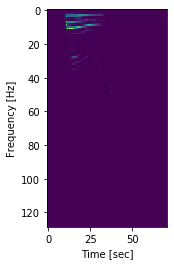

(16000,)

In [1]:
#Convert wav file to spectrogram 
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

sample_rate, samples = wavfile.read(r'D:\speech_commands_v0.02\bird\00f0204f_nohash_0.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
#input in rnn would go as frequency,time
plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

samples.shape
#input in rnn would go as frequency,time

In [ ]:
#building model
def clip_relu(x):
    if x<0:
        return(0)
    elif ((x>0) and (x<20)):
        return x
    else:
        return(20)

In [ ]:
def ctc_loss(y_pred,y_true):
    input_length = tf.constant((5,1))
    label_length = tf.constant((5,1))
    return K.mean(K.ctc_batch_cost(K.batch_flatten(y_true), y_pred, input_length, label_length), axis=-1)

In [ ]:
#topology 
L1 = Dense(64, activation=clip_relu)
L1 = Dropout(0.1)
L2 = Dense(64,activation=clip_relu)
L2 = Dropout(0.1)
L3 = Dense(64, activation=clip_relu)
L3 = Dropout(0.1)
Lb = GRU(64, go_backwards=True, return_sequences=True)
Lf = GRU(64,return_sequences=True)
L5 = Dense(64, activation=clip_relu)
L6 = Dense(29, activation = 'softmax')
keras.optimizers.SGD(learning_rate=0.01, momentum=0.99, nesterov=True) 
model.compile(loss=ctc_loss, metrics=['accuracy'], optimizer=sgd) 